In [16]:
import scipy
import numpy as np
from tools import *
set_seaborn()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
resPH, stimPH = read_lmc('PHOTO')
res1, _ = read_lmc('LMC-BG1')


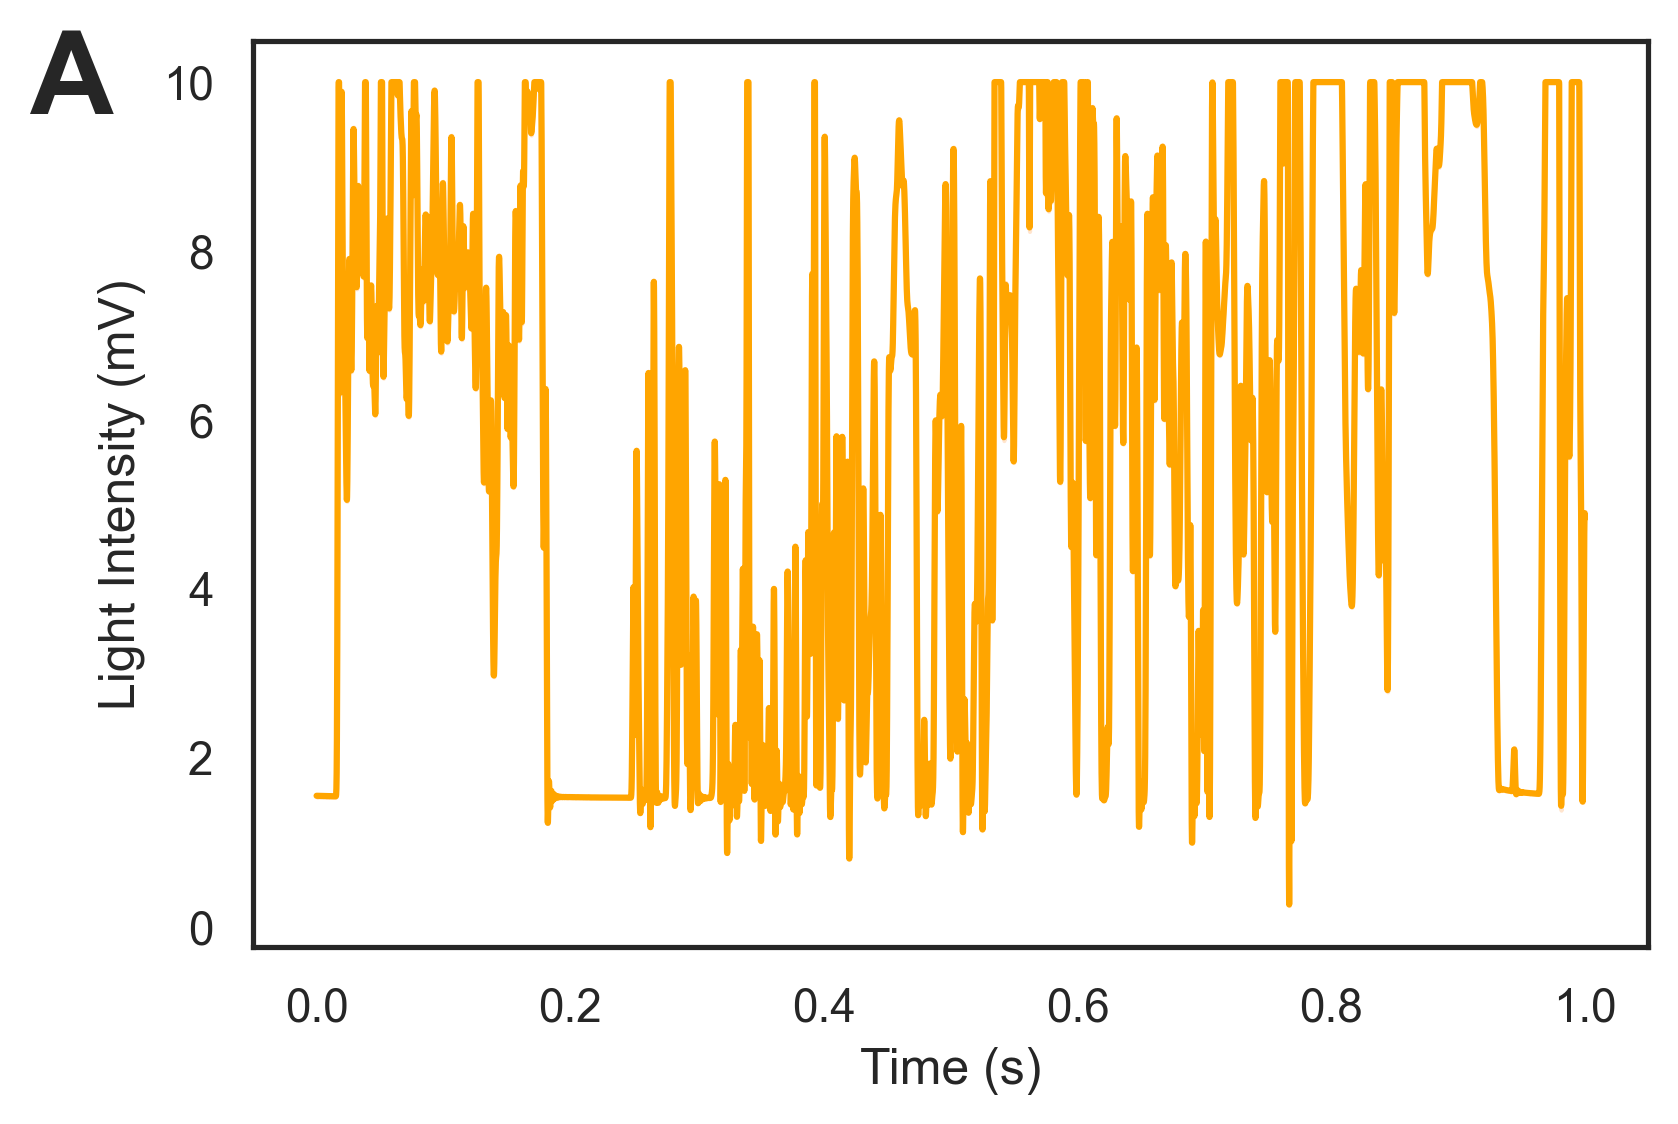

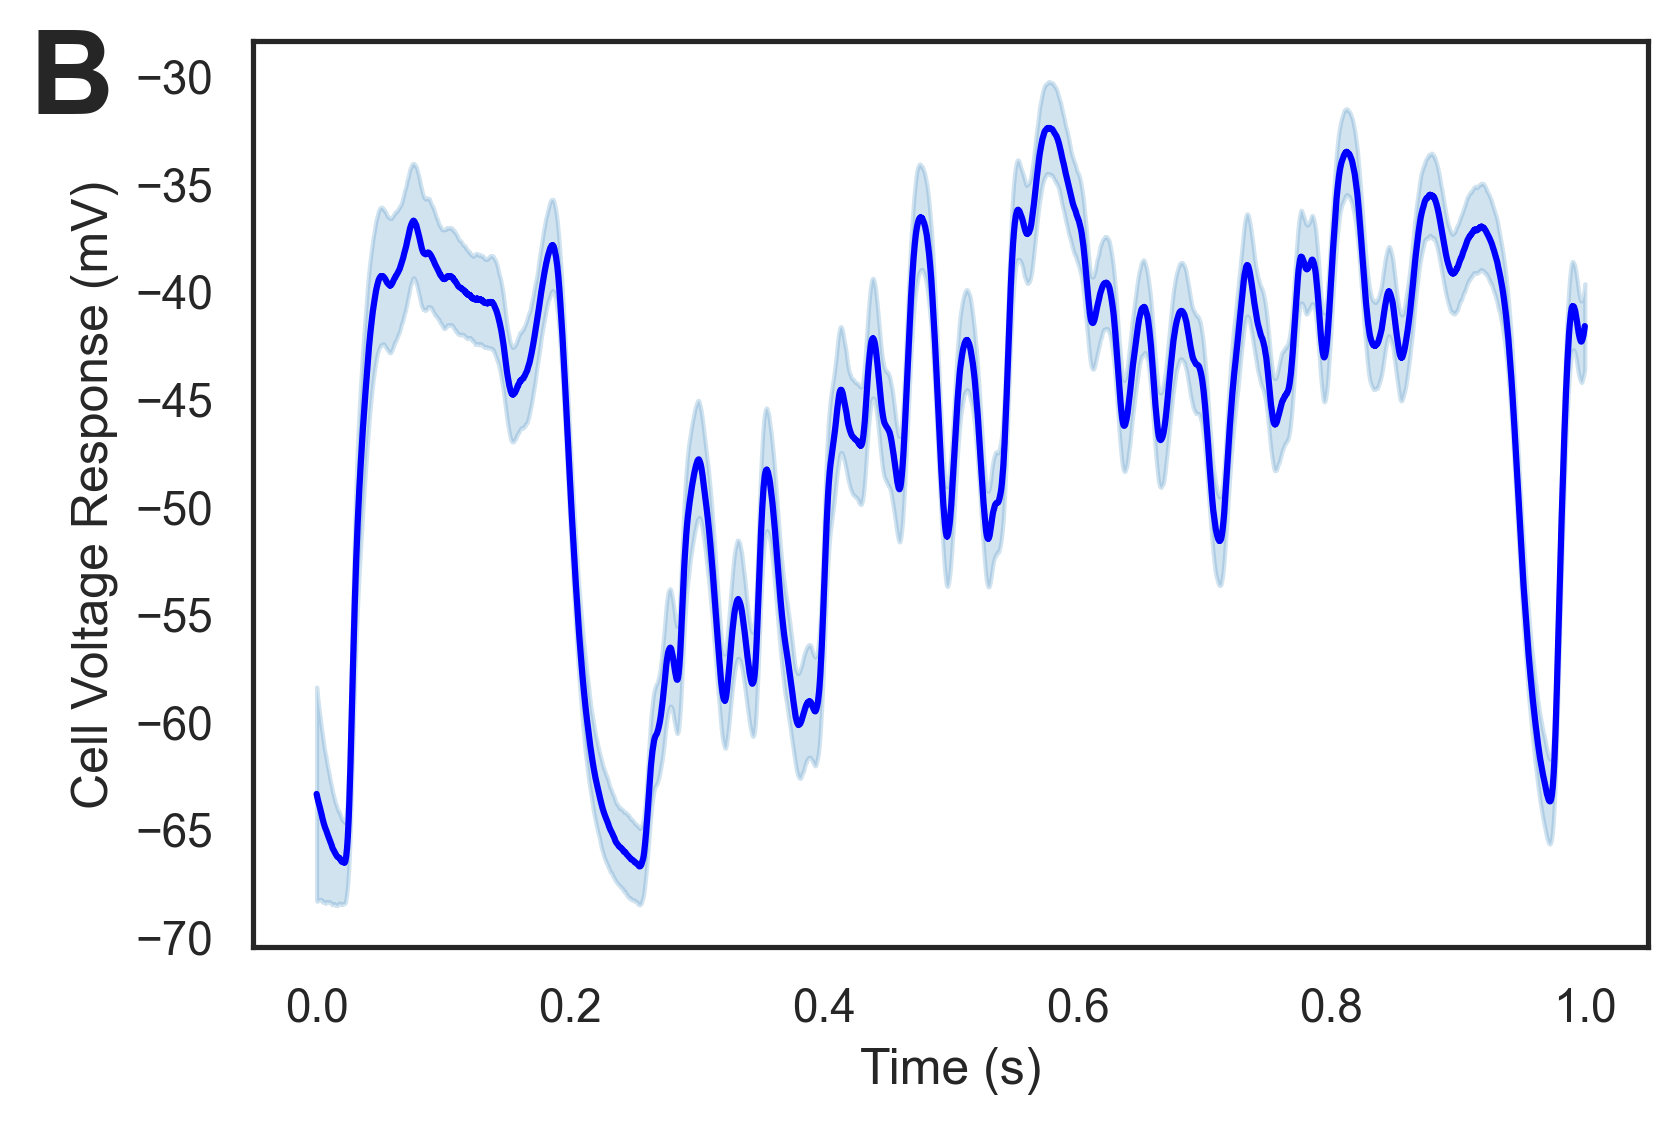

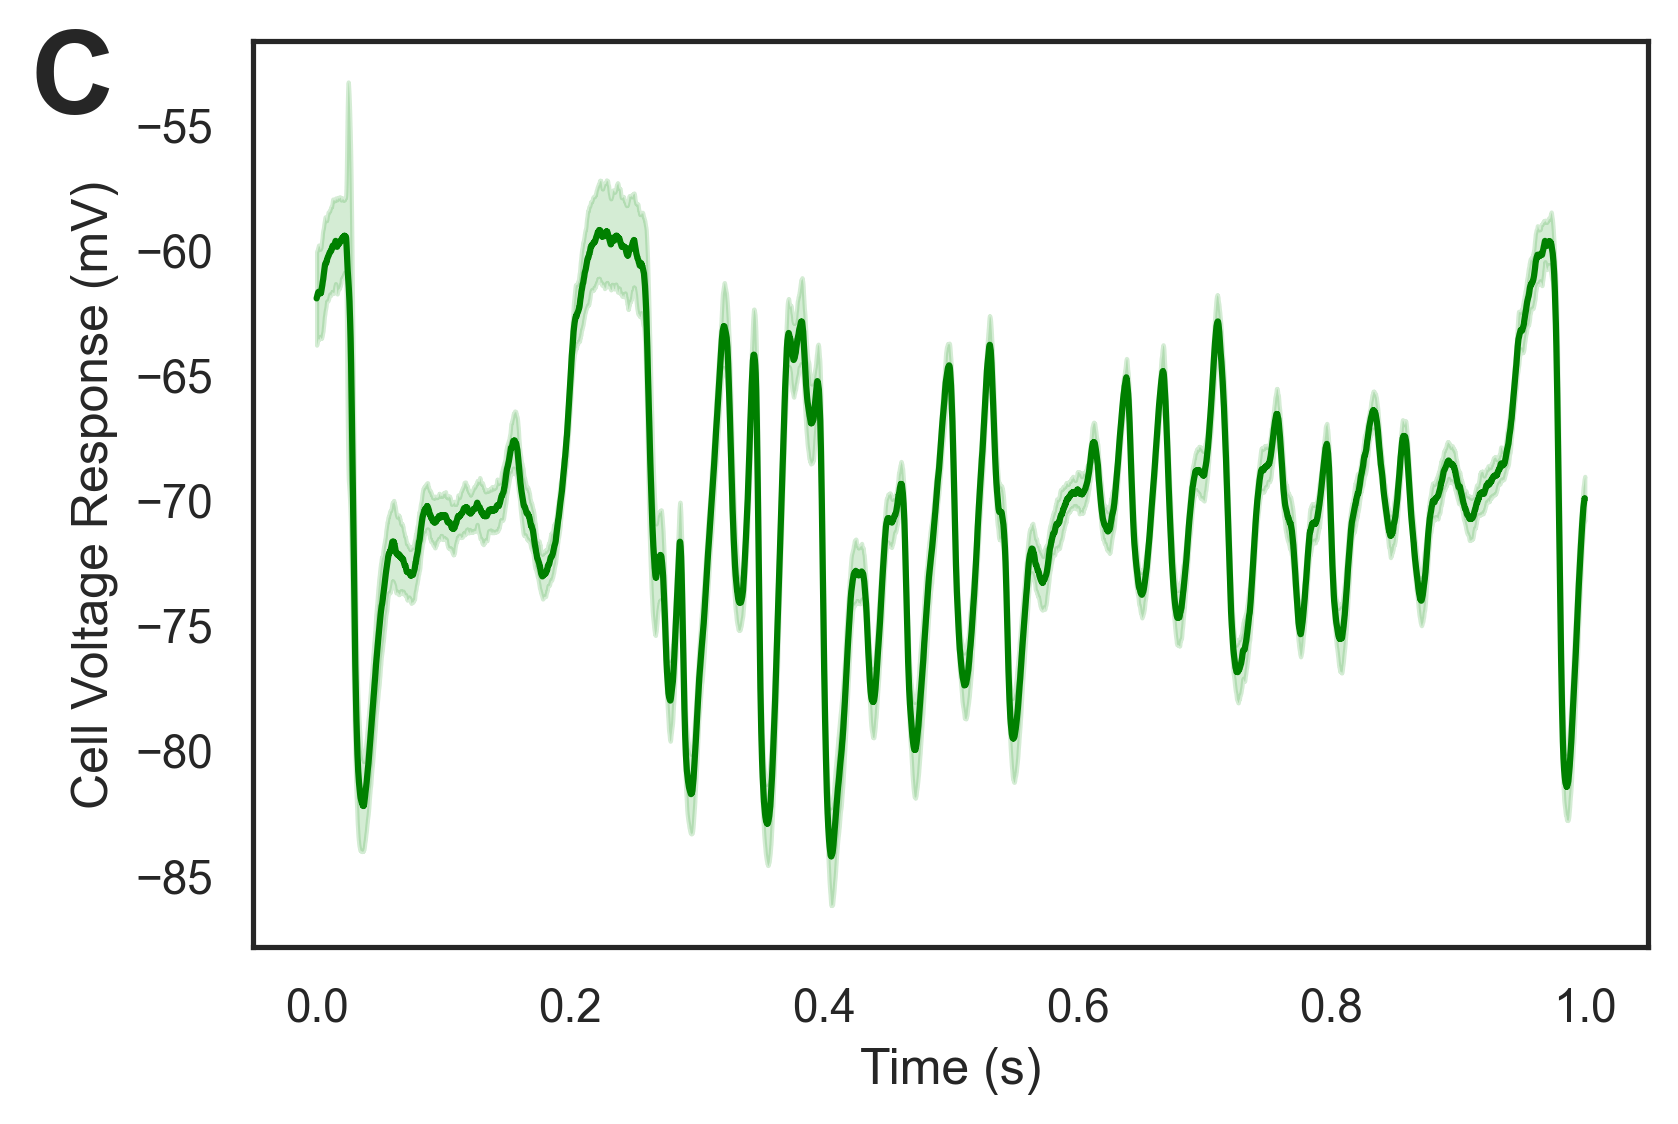

In [18]:
time = np.linspace(0,1,resPH.shape[1])
ph_mean, ph_std = np.mean(resPH, axis=0), np.std(resPH, axis=0)
lmc_mean, lmc_std = np.mean(res1, axis=0), np.std(res1, axis=0)
stim_mean, stim_std = np.mean(stimPH, axis=0), np.std(stimPH, axis=0)

plt.plot(time, stim_mean, color='orange')
plt.fill_between(time, stim_mean-stim_std, stim_mean+stim_std, alpha=0.2, color='tab:orange')
plt.xlabel('Time (s)')
plt.text(-.16, .92, 'A', fontweight='bold', fontsize='28', transform=plt.gca().transAxes)
plt.ylabel('Light Intensity (mV)')
plt.show()

plt.plot(time, ph_mean, color='blue')
plt.fill_between(time, ph_mean-ph_std, ph_mean+ph_std, alpha=0.2, color='tab:blue')
plt.xlabel('Time (s)')
plt.ylabel('Cell Voltage Response (mV)')
plt.text(-.16, .92, 'B', fontweight='bold', fontsize='28', transform=plt.gca().transAxes)
plt.show()

plt.plot(time, lmc_mean, color='green')
plt.fill_between(time, lmc_mean-lmc_std, lmc_mean+lmc_std, alpha=0.2, color='tab:green')
plt.ylabel('Cell Voltage Response (mV)')
plt.text(-.16, .92, 'C', fontweight='bold', fontsize='28', transform=plt.gca().transAxes)
plt.xlabel('Time (s)')
plt.show()

In [19]:
ph_mean *= -1


lags, corr = cross_corr(ph_mean, lmc_mean)
max_corr_index = lags[np.argmax(corr)]
sgn = np.sign(np.max(corr))

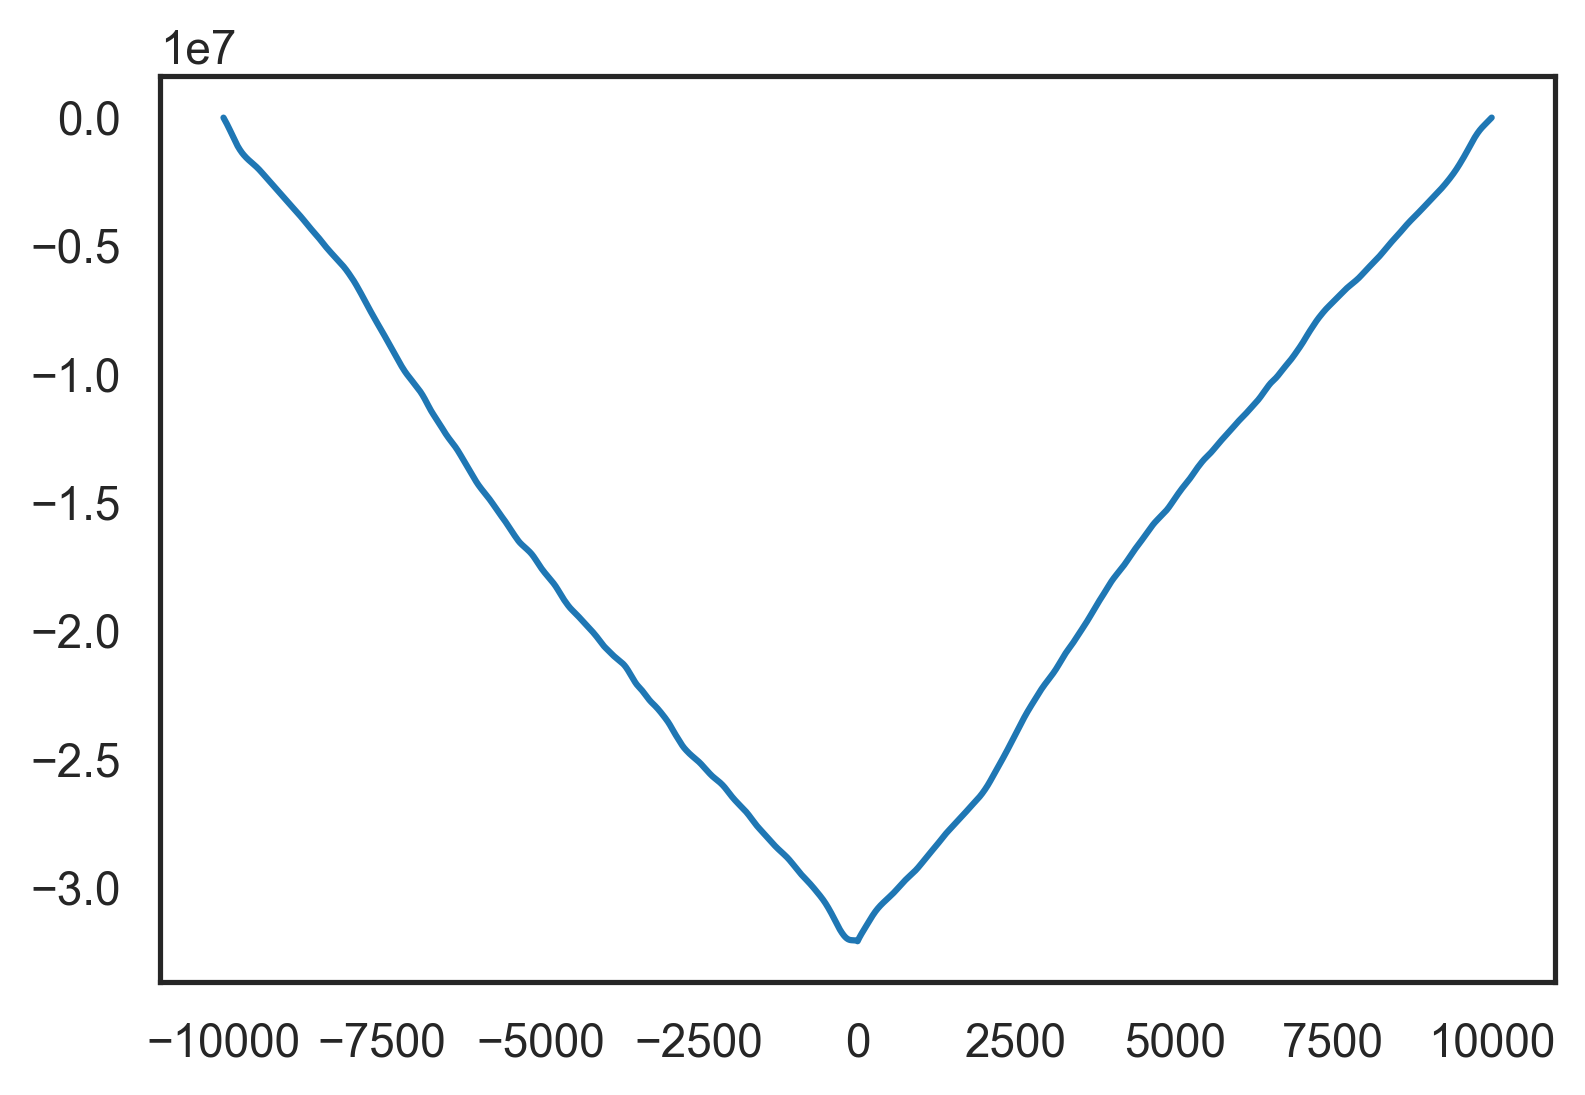

In [20]:
plt.plot(lags, corr)